In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading the url
httpobject= urlopen("https://www.flipkart.com/q/best-laptops-under-rs-50000")
webdata= httpobject.read()
print(webdata)

b'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.4fb0ab.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.

In [3]:
soup=BeautifulSoup(,'lxml')


NameError: name 'soup' is not defined

In [26]:
pages_link=soup1.findAll('a',{'class':'ge-49M'})
domain = 'https://www.flipkart.com/q/best-laptops-under-rs-50000?page='
for i in range(1,47):
    link=domain+str(i)
    page_data = urlopen(link)
    webdata1 = page_data.read()
    webdata += webdata1

In [27]:
soupdata=soup(webdata, 'html.parser')
type(soupdata)

bs4.BeautifulSoup

In [28]:
containers = soupdata.findAll("div",{'class':'_2kHMtA'})
print(type(containers),len(containers))

<class 'bs4.element.ResultSet'> 1848


In [36]:
f= open('Laptops_information.csv','wb')
f.write('ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,Ram,Storage,ImageURL\n'.encode())
for container in containers:
    #Finding product Name
    product = container.find('div',{'class':'_4rR01T'})
    ProductName = product.text.split('-')[0].strip()
    
    # Finding stars
    stars=container.find('div',{'class':'_3LWZlK'})
    try:
        Stars = stars.text
    except:
        Stars = 0
        
    # Ratings & Reviews
    Rating=container.find('span',{'class':'_2_R_DZ'})
    try:
        RatRav=re.findall('\d+,?\d*',Rating.text)
        Ratings=RatRav[0].replace(',','')
        Reviews=RatRav[1].replace(',','')
    except:
        Ratings= 0
        Reviews= 0
    #print(Ratings,Reviews)
   
    # Finding Current Price
    CurrentPrice=container.find('div',{'class':'_30jeq3 _1_WHN1'}).text.replace(',','').replace('₹','')
    #print(CurrentPrice.text)
     
    # Finding MRP
    mrp=container.find("div",{'class':'_3I9_wc _27UcVY'})
      
    try:
        MRP= mrp.text.replace(',','').replace('₹','')
    except:
        MRP = 0
    
    #Finding information about the product
    info = container.findAll('li',{'class':'rgWa7D'})
    Processor = info[0].text
    Ram = info[1].text
    Storage = info[3].text
    #print(Processor,Ram,Storage)

    Image=container.img
    ImageURL=Image.get('src')
    # print(ImageURL)
    print(ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,Ram,Storage,ImageURL)
    f.write(f'{ProductName},{Stars},{Ratings},{Reviews},{CurrentPrice},{MRP},{Processor},{Ram},{Storage},{ImageURL}\n'.encode())
    print('\n')
f.close()

HP 14s Intel Core i3 11th Gen 4.3 4207 367 40490 49509 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/f/g/c/-original-imagp7pfkztgtg93.jpeg?q=70


HP 15s Intel Core i3 12th Gen 4.2 415 50 43990 56261 Intel Core i3 Processor (12th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/o/l/e/-original-imagphhhan259czj.jpeg?q=70


MSI Bravo 15 Ryzen 5 Hexa Core AMD R5 4.4 2743 365 52990 72990 AMD Ryzen 5 Hexa Core Processor 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/7/3/l/-original-imagha3pvvc2xuz2.jpeg?q=70


acer Extensa Core i5 11th Gen 4 276 24 42999 57999 Intel Core i5 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/k/j/0/-original-imagnpcf4yrh7jam.jpeg?q=70


HP Ryzen 5 Hexa Core 5500U 4.3 1569 117 44580 54552 AMD Ryzen 5 Hexa Core Processor 8 GB DDR4 RAM 512 GB SSD https://rukm

HP Intel Core i3 11th Gen 4.2 207 15 49990 58174 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/ktketu80/computer/r/f/r/14-dy0050tu-thin-and-light-laptop-hp-original-imag6w29bs32mq2j.jpeg?q=70


RedmiBook Pro Core i5 11th Gen 4.1 5328 610 39990 59999 Intel Core i5 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/kuwzssw0/computer/x/l/a/redmibook-15-pro-thin-and-light-laptop-redmi-original-imag7xhnakyazyma.jpeg?q=70


HP Core i3 13th Gen 0 0 0 47999 54552 Intel Core i3 Processor (13th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/s/g/c/-original-imagpgzsbncuufhe.jpeg?q=70


HP Core i3 13th Gen 0 0 0 47999 54552 Intel Core i3 Processor (13th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/t/o/8/-original-imagpgzte23hyfpf.jpeg?q=70


MSI Core i3 12th Gen 4.5 11 3 48990 58990 Intel Core i3 Processor (12th G

HP Ryzen 3 Dual Core 3250U 4.1 1271 131 34500 46900 AMD Ryzen 3 Dual Core Processor 8 GB DDR4 RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/1/y/s/-original-imagp8xzdm3andcg.jpeg?q=70


HP Ryzen 3 Dual Core 4.7 3 0 37890 42150 AMD Ryzen 3 Dual Core Processor 8 GB DDR4 RAM 256 GB HDD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/x/n/7/255-g8-r3-laptop-hp-original-imaggwpywbhnywt7.jpeg?q=70


Lenovo IdeaPad Slim 3 Intel Core i3 12th Gen 3.8 9 1 41990 64290 Intel Core i3 Processor (12th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/j/m/2/-original-imagpa5gadtkbm6y.jpeg?q=70


HP 15s Ryzen 3 Dual Core 3200U 4.4 781 151 38000 38500 AMD Ryzen 3 Dual Core Processor 4 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/k5fn3ww0/computer/9/n/g/hp-na-original-imafz4duahdyw5rn.jpeg?q=70


HP G8 Core i3 11th Gen 4.2 144 5 38998 43763 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD http

APPLE 2022 MacBook AIR M2 0 0 0 139000 0 Apple M2 Processor 8 GB Unified Memory RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/v/c/a/-original-imagfdfpnjjpdhq2.jpeg?q=70


MSI Core i7 12th Gen 3.8 6 1 165990 227990 Intel Core i7 Processor (12th Gen) 16 GB DDR5 RAM 1 TB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/l/k/j/-original-imagg3fx8htg5tgu.jpeg?q=70


MSI Sword 15 Core i5 12th Gen 4.7 66 17 85990 98390 Intel Core i5 Processor (12th Gen) 16 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/l2qhjm80/computer/n/t/g/sword-15-a12ud-gaming-laptop-msi-original-imageymchyn4ypgz.jpeg?q=70


ASUS Chromebook Flip Touch Celeron Dual Core 4 2541 355 16990 31990 Intel Celeron Dual Core Processor 4 GB LPDDR4 RAM 29.46 cm (11.6 inch) Touchscreen Display https://rukminim1.flixcart.com/image/312/312/xif0q/computer/s/z/n/-original-imagg3fxfrttfgvj.jpeg?q=70


HP Pavilion Intel Core i5 12th Gen 4.3 206 16 62990 73688 Intel Core i5 Proc

APPLE 2022 MacBook Pro M2 4.5 31 1 115990 129990 Apple M2 Processor 8 GB Unified Memory RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/k/s/m/-original-imagfdewfh9z3pee.jpeg?q=70


MSI Core i5 13th Gen 0 0 0 65990 73990 Intel Core i5 Processor (13th Gen) 16 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/w/f/2/-original-imagnqmwqyhgztv3.jpeg?q=70


APPLE 2021 Macbook Pro M1 Pro 4.8 129 14 239900 0 Apple M1 Pro Processor 16 GB Unified Memory RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/kuyf8nk0/computer/g/z/q/mk1e3hn-a-laptop-apple-original-imag7yzmv57cvg3f.jpeg?q=70


Infinix Y1 Plus Neo Intel Celeron Quad Core 11th Gen 4.2 132 26 24990 34990 Intel Celeron Quad Core Processor (11th Gen) 8 GB LPDDR4X RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/t/d/v/xl30-thin-and-light-laptop-infinix-original-imagzmncdyme776h.jpeg?q=70


HP Pavilion Ryzen 5 Hexa Core 5500U 4.2 125 16 64700 74839 A


HP Chromebook x360 Intel Celeron Quad Core 3.8 38 5 27990 32295 Intel Celeron Quad Core Processor 4 GB LPDDR4 RAM 35.56 cm (14 Inch) Touchscreen Display https://rukminim1.flixcart.com/image/312/312/kzogn0w0/computer/j/u/m/14a-ca0504tu-thin-and-light-laptop-hp-original-imagbmt6dsjhwwhz.jpeg?q=70


MSI Core i7 13th Gen 0 0 0 74990 83990 Intel Core i7 Processor (13th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/p/m/k/modern-15-b13m-290in-thin-and-light-laptop-msi-original-imagnjyhw2dzzpaz.jpeg?q=70


HP Core i5 11th Gen 0 0 0 59327 0 Intel Core i5 Processor (11th Gen) 16 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/4/b/h/-original-imagp7pfa6tscqpx.jpeg?q=70


ASUS Chromebook Flip Touch Celeron Dual Core 4 2541 355 16990 31990 Intel Celeron Dual Core Processor 4 GB LPDDR4 RAM 29.46 cm (11.6 inch) Touchscreen Display https://rukminim1.flixcart.com/image/312/312/xif0q/computer/s/z/n/-original-imagg3fxfrttfgvj

Infinix Y1 Plus Neo Intel Celeron Quad Core 11th Gen 0 0 0 24990 34990 Intel Celeron Quad Core Processor (11th Gen) 8 GB LPDDR4X RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/t/d/v/xl30-thin-and-light-laptop-infinix-original-imagzmncdyme776h.jpeg?q=70


MSI Core i5 12th Gen 0 0 0 99990 111990 Intel Core i5 Processor (12th Gen) 16 GB DDR4 RAM 1 TB HDD|256 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/7/n/j/-original-imagpyc3eyefdjuc.jpeg?q=70


MSI Core i7 13th Gen 0 0 0 147990 165990 Intel Core i7 Processor (13th Gen) 16 GB LPDDR5 RAM 1 TB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/n/a/n/summit-e13flipevo-a13mt-226in-thin-and-light-laptop-msi-original-imagnjymz4ypmtyy.jpeg?q=70


HP Ryzen 5 Quad Core 7520U 0 0 0 52499 60248 AMD Ryzen 5 Quad Core Processor 16 GB LPDDR5 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/8/m/g/-original-imagpecqrbbzdzmj.jpeg?q=70


Infinix INBook Y1 Plus Intel C

SAMSUNG Galaxy Book3 Core i5 Core i5 13th Gen 0 0 0 79990 99990 Intel Core i5 Processor (13th Gen) 16 GB LPDDR4X RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/c/y/k/galaxy-book3-thin-and-light-laptop-samsung-original-imagnb2chzcxhwxk.jpeg?q=70


MSI Core i5 11th Gen 0 0 0 59990 69990 Intel Core i5 Processor (11th Gen) 8 GB DDR4 RAM 1 TB HDD|256 GB SSD https://rukminim1.flixcart.com/image/312/312/l2qhjm80/computer/l/t/g/gf63-thin-11uc-867in-gaming-laptop-msi-original-imageyk5hzuthuyf.jpeg?q=70


HP Chromebook MediaTek Kompanio 500 3.8 6192 701 19990 25451 MediaTek MediaTek Kompanio 500 Processor 4 GB LPDDR4X RAM 29.46 cm (11.6 inch) Touchscreen Display https://rukminim1.flixcart.com/image/312/312/kr3tj0w0/computer/t/q/m/na-chromebook-hp-original-imag4yuphzuyfyc4.jpeg?q=70


Infinix INBook Y1 Plus Intel Core i3 10th Gen 0 0 0 30990 49990 Intel Core i3 Processor (10th Gen) 8 GB LPDDR4X RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/

Infinix INBook Y1 Plus Intel Core i3 10th Gen 0 0 0 30990 49990 Intel Core i3 Processor (10th Gen) 8 GB LPDDR4X RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/u/u/k/-original-imagmxuravjcmdwu.jpeg?q=70


HP Envy x360 Creator OLED Eyesafe Intel Evo Core i5 12th Gen 2.8 4 2 94990 110388 Intel Core i5 Processor (12th Gen) 16 GB LPDDR4X RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/h/k/z/x360-bf0058tu-thin-and-light-laptop-hp-original-imagh4ypj3ujgska.jpeg?q=70


HP Ryzen 3 Dual Core 3.7 3 0 26980 41580 AMD Ryzen 3 Dual Core Processor 4 GB DDR4 RAM 1 TB HDD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/w/1/2/245-g8-notebook-hp-original-imagnyeszwpsmabc.jpeg?q=70


HP Victus Ryzen 7 Octa Core 5800H 0 0 0 79990 105326 AMD Ryzen 7 Octa Core Processor 16 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/l5bd5zk0/computer/l/e/k/15-fb0040ax-gaming-laptop-hp-original-imaggyuezf9qtypd.jpeg?q=70


HP Victus Ryz

HP 15s Ryzen 7 Quad Core 3700U 4.5 134 22 63999 72000 AMD Ryzen 7 Quad Core Processor 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/kbqu4cw0/computer/v/h/g/hp-15s-eq0132au-thin-and-light-laptop-original-imaftf5fhyaj89xj.jpeg?q=70


Infinix INBook Y1 Plus Intel Core i3 10th Gen 4.2 1602 256 27990 44990 Intel Core i3 Processor (10th Gen) 8 GB LPDDR4X RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/u/u/k/-original-imagmxuravjcmdwu.jpeg?q=70


HP Envy 13 Ryzen 5 Quad Core 3500U 4.3 63 11 71000 92000 AMD Ryzen 5 Quad Core Processor 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/k4irzbk0/computer/k/g/y/hp-na-2-in-1-laptop-original-imafnetfpdugtsnx.jpeg?q=70


HP 14s Intel Pentium Quad Core 3.9 489 55 31499 39232 Intel Pentium Quad Core Processor 8 GB DDR4 RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/b/u/y/-original-imagp8xzmamquskg.jpeg?q=70


HP Core i5 13th Gen 0 0 0 66890 75059 Intel Co

HP Pavilion Ryzen 5 Hexa Core 5500U 3.9 21 0 64000 73840 AMD Ryzen 5 Hexa Core Processor 16 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/kwcfngw0/computer/u/e/0/-original-imag9fgxqcsrfej7.jpeg?q=70


ASUS VivoBook 14 (2021) Celeron Dual Core 4.1 1785 212 23990 33990 Intel Celeron Dual Core Processor 4 GB DDR4 RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/l2m78280/computer/z/e/f/-original-imagdx9szs8xz2rk.jpeg?q=70


HP Pavilion Ryzen 5 Hexa Core 5500U 4.3 272 28 67500 71000 AMD Ryzen 5 Hexa Core Processor 16 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/ksru0sw0/computer/k/o/e/15-eh1103au-thin-and-light-laptop-hp-original-imag69q3fndch3kz.jpeg?q=70


HP Ryzen 7 Octa Core 0 0 0 52999 99999 AMD Ryzen 7 Octa Core Processor 8 GB LPDDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/f/z/m/probook-thin-and-light-laptop-hp-original-imagp3fazxqrhyzz.jpeg?q=70


HP Pavilion Intel Core i5 11th Gen 4.1 41 2 655



ASUS VivoBook Ultra K15 OLED Core i3 11th Gen 4.4 520 76 45990 62990 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 1 TB HDD|256 GB SSD https://rukminim1.flixcart.com/image/312/312/l2dmky80/computer/l/c/g/-original-imagdqdyewdfx452.jpeg?q=70


Lenovo Thinkbook Core i3 11th Gen 4.3 62 5 49990 72850 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/ktop5e80/computer/y/q/c/thinkbook-15-thin-and-light-laptop-lenovo-original-imag6zepbmu2bu9f.jpeg?q=70


ASUS Core i3 13th Gen 0 0 0 46249 59500 Intel Core i3 Processor (13th Gen) 8 GB DDR5 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/1/i/t/vivobook-15-2023-laptop-asus-original-imagp4qhapzhzds6.jpeg?q=70


Infinix INBook Y1 Plus Intel Core i3 10th Gen 0 0 0 30990 49990 Intel Core i3 Processor (10th Gen) 8 GB LPDDR4X RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/m/u/z/-original-imagmxurgcshfkx7.jpeg?q=70


DELL Core i3 12th Gen 0

Infinix Y1 Plus Neo Intel Celeron Quad Core 11th Gen 0 0 0 27490 39990 Intel Celeron Quad Core Processor (11th Gen) 8 GB LPDDR4X RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/t/d/v/xl30-thin-and-light-laptop-infinix-original-imagzmncdyme776h.jpeg?q=70


Infinix INBook X2 Plus Core i5 11th Gen 4.3 77 11 40990 59990 Intel Core i5 Processor (11th Gen) 16 GB LPDDR4X RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/n/e/n/-original-imagjfgfjnwnq89g.jpeg?q=70


Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen 4.3 693 65 39990 68790 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/n/i/u/-original-imagpa5fbvqzk2xn.jpeg?q=70


ASUS VivoBook Flip 14 Core i3 11th Gen 4.4 267 27 44990 66990 Intel Core i3 Processor (11th Gen) 8 GB LPDDR4X RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/l3t2fm80/computer/p/q/q/-original-imageuecysr3cuca.jpeg?q=70


Infinix INBook Y1 Pl

Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen 0 0 0 33990 59390 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/n/i/u/-original-imagpa5fbvqzk2xn.jpeg?q=70


ASUS Core i3 0 0 0 41649 56990 Intel Core i3 Processor 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/z/7/b/laptop-asus-x1502za-ej953ws-laptop-asus-original-imagzs2wv7txbyyw.jpeg?q=70


DELL Inspiron Core i3 11th Gen 3 5 0 44999 60837 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/kzygpzk0/computer/z/p/p/inspiron-3511-thin-and-light-laptop-dell-original-imagbuv2dwaehygy.jpeg?q=70


DELL Vostro Core i3 10th Gen 4.2 76 7 42199 60500 Intel Core i3 Processor (10th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/l44hyfk0/computer/o/d/w/-original-imagf35eyyeezqpk.jpeg?q=70


Infinix Y1 Plus Neo Intel Celeron Quad Core 11th Gen 0 0 0 27490 39990 In

ASUS Core i3 11th Gen 0 0 0 36815 49990 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/f/q/3/vivobook-15-laptop-asus-original-imagp3fg3vwyufjt.jpeg?q=70


Infinix INBook Y1 Plus Intel Core i3 10th Gen 4.2 1602 256 27990 44990 Intel Core i3 Processor (10th Gen) 8 GB LPDDR4X RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/u/u/k/-original-imagmxuravjcmdwu.jpeg?q=70


Lenovo IdeaPad 3 Intel Core i3 10th Gen 4.2 66 8 35990 53790 Intel Core i3 Processor (10th Gen) 4 GB DDR4 RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/ku4ezrk0/computer/h/x/8/14iil05-thin-and-light-laptop-lenovo-original-imag7anttggbgmzm.jpeg?q=70


Lenovo Ideapad S340 Core i3 10th Gen 4.2 526 88 39990 58490 Intel Core i3 Processor (10th Gen) 8 GB DDR4 RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/k94j24w0/computer/z/f/p/lenovo-na-thin-and-light-laptop-original-imafqzdgma75wgxz.jpeg?q=70


DELL Vost

DELL Inspiron Core i3 11th Gen 3.6 705 89 38999 48000 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 1 TB HDD https://rukminim1.flixcart.com/image/312/312/l44hyfk0/computer/v/h/r/-original-imagf35ecakxcshj.jpeg?q=70


DELL Inspiron 3505 Ryzen 3 Dual Core 3250U 4.3 1297 202 39450 41969 AMD Ryzen 3 Dual Core Processor 8 GB DDR4 RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/kirr24w0/computer/z/y/9/dell-na-laptop-original-imafyhm5jgmh4jts.jpeg?q=70


Lenovo IdeaPad Gaming 3 Ryzen 5 Hexa Core 5600H 4.1 14 1 56990 89490 AMD Ryzen 5 Hexa Core Processor 8 GB DDR4 RAM 1 TB HDD|256 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/v/k/d/14iau7-gaming-laptop-lenovo-original-imaghnq4zafgebtu.jpeg?q=70


Infinix INBook Y1 Plus Intel Core i3 10th Gen 0 0 0 30990 49990 Intel Core i3 Processor (10th Gen) 8 GB LPDDR4X RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/m/u/z/-original-imagmxurgcshfkx7.jpeg?q=70


ASUS VivoBook 14 (2021) Celeron Du

Lenovo IdeaPad Ryzen 7 Octa Core 5800H 4.5 471 54 78990 116090 AMD Ryzen 7 Octa Core Processor 16 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/kynb6vk0/computer/k/j/a/-original-imagaufne7h4hgbz.jpeg?q=70


Infinix INBook Y1 Plus Intel Core i3 10th Gen 4.2 1602 256 27990 44990 Intel Core i3 Processor (10th Gen) 8 GB LPDDR4X RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/p/c/4/-original-imagmxurypdzh2zb.jpeg?q=70


Lenovo IdeaPad 5 Core i7 12th Gen 0 0 0 127990 0 Intel Core i7 Processor (12th Gen) 16 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/w/a/o/15ial7-laptop-lenovo-original-imagp7xwbdcqfegn.jpeg?q=70


Infinix Y1 Plus Neo Intel Celeron Quad Core 11th Gen 4.2 132 26 24990 34990 Intel Celeron Quad Core Processor (11th Gen) 8 GB LPDDR4X RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/b/l/n/xl30-thin-and-light-laptop-infinix-original-imagzmncmw5wukam.jpeg?q=70


DELL Insp



HP Laptop Ryzen 3 Quad Core 5300U 4.3 44 10 36990 48419 AMD Ryzen 3 Quad Core Processor 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/d/p/b/-original-imagp8xz9yxjfurj.jpeg?q=70


HP Core i3 11th Gen 4.1 92 8 37990 44253 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/9/v/w/245-g8-business-laptop-hp-original-imagn4bctguugysg.jpeg?q=70


HP 15s Ryzen 3 Quad Core 5300U 4.3 286 43 40490 52900 AMD Ryzen 3 Quad Core Processor 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/i/n/9/-original-imagp8xzevzkrnhq.jpeg?q=70


Infinix INBook X2 Plus Core i5 11th Gen 4.1 150 36 38990 54990 Intel Core i5 Processor (11th Gen) 8 GB LPDDR4X RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/i/f/r/-original-imagjfgyxmcz7scf.jpeg?q=70


HP Ryzen 3 Quad Core 7320U 3.8 4 1 39990 47207 AMD Ryzen 3 Quad Core Processor 8 GB DDR4 RAM 512 GB SS

Infinix Y1 Plus Neo Intel Celeron Quad Core 11th Gen 4.2 132 26 24990 34990 Intel Celeron Quad Core Processor (11th Gen) 8 GB LPDDR4X RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/t/d/v/xl30-thin-and-light-laptop-infinix-original-imagzmncdyme776h.jpeg?q=70


HP Pavilion (2023) Eyesafe Intel Core i7 12th Gen 4.2 32 2 89500 100687 Intel Core i7 Processor (12th Gen) 16 GB DDR4 RAM 1 TB SSD https://rukminim1.flixcart.com/image/312/312/l2hwwi80/computer/9/5/2/eg2036tu-thin-and-light-laptop-hp-original-imagduyqdgd5gtas.jpeg?q=70


HP Pavilion Ryzen 5 Hexa Core 5625U 4.1 42 7 56999 69083 AMD Ryzen 5 Hexa Core Processor 16 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/u/b/s/-original-imagp7pfhsmmdawz.jpeg?q=70


HP Pavilion Aero (2023) Ryzen 5 Hexa Core 7535U 4.3 23 3 68990 80314 AMD Ryzen 5 Hexa Core Processor 16 GB LPDDR5 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/f/w/y/13-be2048au-thin-and-ligh

MSI Core i5 12th Gen 0 0 0 91990 114990 Intel Core i5 Processor (12th Gen) 16 GB DDR4 RAM 1 TB HDD|256 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/7/n/j/-original-imagpyc3eyefdjuc.jpeg?q=70


APPLE 2022 MacBook AIR M2 4.6 73 5 106990 119900 Apple M2 Processor 8 GB Unified Memory RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/m/b/n/-original-imagfdf4xnbyyxpa.jpeg?q=70


HP Pavilion Core i5 12th Gen 4.2 6 0 70990 84835 Intel Core i5 Processor (12th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/d/r/t/14-ek0088tu-thin-and-light-laptop-hp-original-imagh89bdga9fcys.jpeg?q=70


Lenovo IdeaPad 3 Intel Core i5 12th Gen 4.1 115 14 58990 82490 Intel Core i5 Processor (12th Gen) 16 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/j/m/2/-original-imagpa5gadtkbm6y.jpeg?q=70


SAMSUNG Galaxy Book3 Core i5 Core i5 13th Gen 4.5 26 5 74990 93990 Intel Core i5 Processor (13th G

HP Ryzen 9 Octa Core 6900HX 0 0 0 154490 178167 AMD Ryzen 9 Octa Core Processor 32 GB DDR5 RAM 1 TB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/c/s/a/16-n0049ax-gaming-laptop-hp-original-imaghwptyggvfjjd.jpeg?q=70


Infinix INBook X1 Neo Series Celeron Quad Core 4.1 1423 235 22990 29990 Intel Celeron Quad Core Processor 4 GB LPDDR4X RAM 128 GB SSD https://rukminim1.flixcart.com/image/312/312/l5fnhjk0/computer/h/g/l/inbook-x1-neo-thin-and-light-laptop-infinix-original-imagg49gbqxuhfha.jpeg?q=70


MSI Core i5 13th Gen 0 0 0 65990 73990 Intel Core i5 Processor (13th Gen) 16 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/w/f/2/-original-imagnqmwqyhgztv3.jpeg?q=70


HP Victus Ryzen 5 Hexa Core 5600H 4.7 6 0 65990 82671 AMD Ryzen 5 Hexa Core Processor 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/l5bd5zk0/computer/l/e/k/15-fb0040ax-gaming-laptop-hp-original-imaggyuezf9qtypd.jpeg?q=70


HP Victus Core i7 12th Gen 

Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen 4.3 693 65 39990 68790 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/n/i/u/-original-imagpa5fbvqzk2xn.jpeg?q=70


HP Ryzen 5 Quad Core 7520U 0 0 0 52499 60248 AMD Ryzen 5 Quad Core Processor 16 GB LPDDR5 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/8/m/g/-original-imagpecqrbbzdzmj.jpeg?q=70


MSI Modern 14 Core i7 11th Gen 4.6 24 5 75990 89990 Intel Core i7 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/klzhq4w0/computer/s/k/x/na-thin-and-light-laptop-msi-original-imagyzpcazfbmhjp.jpeg?q=70


HP Victus Ryzen 5 Hexa Core 5600H 4.3 15 2 69990 80586 AMD Ryzen 5 Hexa Core Processor 16 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/i/t/4/-original-imagz9f6yd4es4s3.jpeg?q=70


HP Victus Ryzen 7 Octa Core 5800H 4 26 3 62990 90056 AMD Ryzen 7 Octa Core Processor 8 GB D

MICROSOFT Surface Laptop 3 Ryzen 5 Quad Core 3580U 3.8 9 0 99990 124999 AMD Ryzen 5 Quad Core Processor 8 GB DDR4 RAM 128 GB SSD https://rukminim1.flixcart.com/image/312/312/k9he0sw0/computer/m/h/d/microsoft-original-imafr9qyecvfeyta.jpeg?q=70


HP Envy x360 Creator OLED Eyesafe Intel Evo Core i7 12th Gen 4.4 8 1 104990 121630 Intel Core i7 Processor (12th Gen) 16 GB LPDDR4X RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/r/y/n/x360-bf0059tu-thin-and-light-laptop-hp-original-imagh4z7h3f56xxj.jpeg?q=70


Infinix Y1 Plus Neo Intel Celeron Quad Core 11th Gen 4.3 96 17 27490 39990 Intel Celeron Quad Core Processor (11th Gen) 8 GB LPDDR4X RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/t/d/v/xl30-thin-and-light-laptop-infinix-original-imagzmncdyme776h.jpeg?q=70


HP HP 240 G8 Core i3 11th Gen 0 0 0 34990 43763 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 512 GB HDD|512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/compute

HP Pavilion Intel Core i5 11th Gen 4.5 185 8 81900 83900 Intel Core i5 Processor (11th Gen) 16 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/kufuikw0/computer/i/o/s/14-dy0003tu-thin-and-light-laptop-hp-original-imag7k25vgcnds5f.jpeg?q=70


Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen 4.3 693 65 39990 68790 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/n/i/u/-original-imagpa5fbvqzk2xn.jpeg?q=70


HP 14s Intel Core i5 11th Gen 4 22 2 65000 81000 Intel Core i5 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/i/y/4/-original-imagp7pfhwm9rnsy.jpeg?q=70


HP Core i5 11th Gen 0 0 0 81500 89000 Intel Core i5 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/kzx1a4w0/computer/z/5/o/victus-laptop-hp-original-imagbtheub4n5u8g.jpeg?q=70


HP Pavilion Ryzen 5 Hexa Core 5500U 4.3 272 28 67500 71000 AMD Ryzen 

Avita Liber V14 Ryzen 5 Quad Core 3500U 4.1 2581 493 49990 55490 AMD Ryzen 5 Quad Core Processor 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/kh3qkcw0/computer/x/b/4/avita-original-imafx7y8txxk8gkz.jpeg?q=70


Infinix Y1 Plus Neo Intel Celeron Quad Core 11th Gen 0 0 0 24990 34990 Intel Celeron Quad Core Processor (11th Gen) 8 GB LPDDR4X RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/t/d/v/xl30-thin-and-light-laptop-infinix-original-imagzmncdyme776h.jpeg?q=70


DELL Ryzen 5 Quad Core 0 0 0 46990 59808 AMD Ryzen 5 Quad Core Processor 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/0/o/f/d585059win8-thin-and-light-laptop-dell-original-imagkxbhqb3naxjt.jpeg?q=70


ASUS Core i3 12th Gen 0 0 0 49999 59990 Intel Core i3 Processor (12th Gen) 8 GB DDR5 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/f/s/k/vivobook-14-oled-laptop-asus-original-imagnzbrm7tr27vn.jpeg?q=70


acer Asp

DELL Inspiron Core i3 10th Gen 4.3 70 7 43490 63200 Intel Core i3 Processor (10th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/krdtlzk0/computer/l/k/r/na-laptop-dell-original-imag57f9psmfjcxs.jpeg?q=70


ASUS Ryzen 3 Dual Core 0 0 0 39438 50990 AMD Ryzen 3 Dual Core Processor 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/1/v/g/vivobook-go-14-laptop-asus-original-imagzmwzfvpvvsev.jpeg?q=70


Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen 4.2 348 33 33990 60890 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/6/t/7/15itl05-thin-and-light-laptop-lenovo-original-imagheh5nvy6gq9k.jpeg?q=70


Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen 0 0 0 33990 59390 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/n/i/u/-original-imagpa5fbvqzk2xn.jpeg?q=70


DELL Inspiron Ryzen 3 Quad Core 5425U 3.

DELL Ryzen 3 Dual Core 3250U 3.6 31 3 40990 53774 AMD Ryzen 3 Dual Core Processor 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/l0bbonk0/computer/e/h/g/inspiron-3515-thin-and-light-laptop-dell-original-imagc4khfybjef5s.jpeg?q=70


ASUS Vivobook 14 (2023) Core i3 13th Gen 0 0 0 45990 57990 Intel Core i3 Processor (13th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/f/u/o/-original-imagzvkfkspztfmz.jpeg?q=70


Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen 4.3 693 65 39990 68790 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/n/i/u/-original-imagpa5fbvqzk2xn.jpeg?q=70


ASUS VivoBook 14 Core i5 10th Gen 4.4 1971 226 48100 66990 Intel Core i5 Processor (10th Gen) 8 GB DDR4 RAM 1 TB HDD|256 GB SSD https://rukminim1.flixcart.com/image/312/312/k91o6fk0/computer/k/8/h/asus-original-imafqxfewfakvj64.jpeg?q=70


DELL Inspiron Core i5 11th Gen 4.2 17 3 49890 90

DELL Vostro Core i3 11th Gen 4.2 541 58 42500 43805 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/l44hyfk0/computer/1/f/b/-original-imagf35erduuk5gh.jpeg?q=70


Infinix INBook X1 Neo Series Celeron Quad Core 4.1 1423 235 22990 29990 Intel Celeron Quad Core Processor 4 GB LPDDR4X RAM 128 GB SSD https://rukminim1.flixcart.com/image/312/312/l5fnhjk0/computer/h/g/l/inbook-x1-neo-thin-and-light-laptop-infinix-original-imagg49gbqxuhfha.jpeg?q=70


Smartron t.book flex Core i5 7th Gen 3.9 28 4 48990 55999 Intel Core i5 Processor (7th Gen) 4 GB DDR3 RAM 128 GB SSD https://rukminim1.flixcart.com/image/312/312/jgzfv680/computer/s/a/m/smartron-na-2-in-1-laptop-original-imaf53z24vwad4cu.jpeg?q=70


Lenovo V15 G2 Intel Core i5 11th Gen 3.6 7 0 49490 81450 Intel Core i5 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/d/t/c/v15-g2-alc-laptop-lenovo-original-imaghq2ffspmtfuh.jpeg?q=70





DELL Inspiron Ryzen 3 Quad Core 5425U 3.8 10 1 41890 57036 AMD Ryzen 3 Quad Core Processor 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/l1mh7rk0/computer/e/4/q/inspiron-3525-notebook-dell-original-imagd5k6ykzvkhdc.jpeg?q=70


Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen 4.2 348 33 33990 60890 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/6/t/7/15itl05-thin-and-light-laptop-lenovo-original-imagheh5nvy6gq9k.jpeg?q=70


Infinix INBook X1 Neo Series Celeron Quad Core 4.1 1423 235 22990 29990 Intel Celeron Quad Core Processor 4 GB LPDDR4X RAM 128 GB SSD https://rukminim1.flixcart.com/image/312/312/l5fnhjk0/computer/h/g/l/inbook-x1-neo-thin-and-light-laptop-infinix-original-imagg49gbqxuhfha.jpeg?q=70


DELL Inspiron Core i3 12th Gen 0 0 0 44999 65000 Intel Core i3 Processor (12th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/l/o/8/inspiron-3520-thin

Infinix INBook X1 Neo Series Celeron Quad Core 4.1 1423 235 22990 29990 Intel Celeron Quad Core Processor 4 GB LPDDR4X RAM 128 GB SSD https://rukminim1.flixcart.com/image/312/312/l5fnhjk0/computer/h/g/l/inbook-x1-neo-thin-and-light-laptop-infinix-original-imagg49gbqxuhfha.jpeg?q=70


Lenovo Intel Celeron Dual Core 4.1 1131 112 29490 40490 Intel Celeron Dual Core Processor 8 GB DDR4 RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/z/b/z/-original-imagmmng8dppnn4v.jpeg?q=70


DELL Vostro Core i3 11th Gen 4.2 656 45 38990 58489 Processor: Intel i3-1115G4 (Base- 1.7 GHz & Turbo up to 4.10 GHz) 2 Cores RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD Display: 15.6" FHD WVA AG Narrow Border https://rukminim1.flixcart.com/image/312/312/xif0q/computer/x/o/u/-original-imaghkk994ybh4fh.jpeg?q=70


realme Book (Slim) Core i3 11th Gen 4.4 13200 1926 36999 54999 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/ksez24w0/c

Lenovo IdeaPad 3 Intel Core i3 10th Gen 4.2 491 53 37500 52250 Intel Core i3 Processor (10th Gen) 8 GB DDR4 RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/keaaavk0/computer/c/q/t/lenovo-na-thin-and-light-laptop-original-imafuzt873zgp9xe.jpeg?q=70


acer Aspire 3 Core i3 11th Gen 4.2 45 1 39800 49999 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/l5h2xe80/screen-guard/screen-guard/t/u/j/acer-aspire-3-intel-core-i3-15-6-inch-inch-screen-guards-original-imagg4zyxxuwqfhv.jpeg?q=70


Infinix Y1 Plus Neo Intel Celeron Quad Core 11th Gen 4.2 132 26 24990 34990 Intel Celeron Quad Core Processor (11th Gen) 8 GB LPDDR4X RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/t/d/v/xl30-thin-and-light-laptop-infinix-original-imagzmncdyme776h.jpeg?q=70


acer Extensa 15 Core i3 11th Gen 4.1 203 27 36800 52000 Intel Core i3 Processor (11th Gen) 4 GB DDR4 RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/

Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen 4.2 391 26 33990 59390 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/n/i/u/-original-imagpa5fbvqzk2xn.jpeg?q=70


ASUS ZenBook Duo 14 (2021) Touch Panel Core i5 11th Gen 4.2 6 0 74990 122990 Intel Core i5 Processor (11th Gen) 8 GB LPDDR4X RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/3/b/t/-original-imaghsggffspg9pw.jpeg?q=70


acer Predator Helios Neo 16 Core i7 13th Gen 0 0 0 124990 156999 Intel Core i7 Processor (13th Gen) 16 GB DDR5 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/x/r/d/-original-imagp7w2wgf5ense.jpeg?q=70


Lenovo Ryzen 3 Hexa Core 5300U 0 0 0 33863 55000 AMD Ryzen 3 Hexa Core Processor 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/d/t/c/v15-g2-alc-laptop-lenovo-original-imaghq2ffspmtfuh.jpeg?q=70


Infinix Y1 Plus Neo Intel Celeron Quad Core 11th Gen 4.3

ASUS ROG Strix SCAR 15 (2022) Core i9 12th Gen 5 4 0 281990 359990 Intel Core i9 Processor (12th Gen) 32 GB DDR5 RAM 1 TB SSD https://rukminim1.flixcart.com/image/312/312/l0vbukw0/computer/4/i/k/-original-imagckcfgfba4fja.jpeg?q=70


Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen 4.3 693 65 39990 68790 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/n/i/u/-original-imagpa5fbvqzk2xn.jpeg?q=70


ASUS Zenbook 14 OLED (2023) Ryzen 7 Octa Core 7730U 0 0 0 104990 128990 AMD Ryzen 7 Octa Core Processor 16 GB LPDDR4X RAM 1 TB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/y/q/x/-original-imagnzg27cw5be6z.jpeg?q=70


ASUS ROG Zephyrus Duo 16 Ryzen 9 16 Core 7945HX 0 0 0 429990 479990 AMD Ryzen 9 16 Core Processor 32 GB DDR5 RAM 2 TB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/z/c/p/-original-imagz42ugkyzeaez.jpeg?q=70


ASUS TUF Dash F15 Core i7 12th Gen 4.9 8 1 150739 188990 Intel Core i7

ASUS ROG Zephyrus G15 with 90Whr Battery Ryzen 7 Octa Core 6800HS 0 0 0 145990 189990 AMD Ryzen 7 Octa Core Processor 16 GB DDR5 RAM 1 TB SSD https://rukminim1.flixcart.com/image/312/312/l58iaa80/computer/n/d/u/ga503rm-hq030ws-gaming-laptop-asus-original-imagfyjexnzcas5v.jpeg?q=70


ASUS ROG Strix G15 Ryzen 9 Octa Core AMD R9 4.4 89 12 104990 136990 AMD Ryzen 9 Octa Core Processor 16 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/l3vxbbk0/computer/g/u/y/-original-imagewgtfgzf8fdd.jpeg?q=70


Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen 4.2 391 26 33990 59390 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/n/i/u/-original-imagpa5fbvqzk2xn.jpeg?q=70


DELL Inspiron Core i5 11th Gen 4.2 100 13 69990 81800 Intel Core i5 Processor (11th Gen) 16 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/ku5ufm80/computer/q/u/6/na-thin-and-light-laptop-dell-original-imag7csrq6zahxx3.jpeg?q=70

Infinix Y1 Plus Neo Intel Celeron Quad Core 11th Gen 4.2 132 26 24990 34990 Intel Celeron Quad Core Processor (11th Gen) 8 GB LPDDR4X RAM 256 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/t/d/v/xl30-thin-and-light-laptop-infinix-original-imagzmncdyme776h.jpeg?q=70


ASUS Ryzen 7 Octa Core 5800H/HS 0 0 0 79990 88990 AMD Ryzen 7 Octa Core Processor 16 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/p/e/u/m6500qc-hn541ws-thin-and-light-laptop-asus-original-imagzym87bfyhmyb.jpeg?q=70


ASUS Zenbook Pro 14 Duo OLED (2022) with Dual Screen Touch Panel Core i5 12th Gen 5 1 1 109990 170990 Intel Core i5 Processor (12th Gen) 16 GB LPDDR5 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/m/9/g/-original-imaghrfhqeqntfzz.jpeg?q=70


ASUS Ryzen 7 Quad Core 0 0 0 87486 135000 AMD Ryzen 7 Quad Core Processor 16 GB DDR4 RAM 1 TB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/b/r/g/tuf-gaming-a15-gaming-l

In [37]:
df=pd.read_csv('laptops_information.csv',error_bad_lines = False)
df

C:\Users\ANJANA\AppData\Local\Temp\ipykernel_12868\682316888.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv('laptops_information.csv',error_bad_lines = False)
b'Skipping line 343: expected 10 fields, saw 12\nSkipping line 352: expected 10 fields, saw 12\nSkipping line 412: expected 10 fields, saw 12\nSkipping line 570: expected 10 fields, saw 17\nSkipping line 709: expected 10 fields, saw 14\nSkipping line 852: expected 10 fields, saw 17\nSkipping line 860: expected 10 fields, saw 13\nSkipping line 1184: expected 10 fields, saw 12\nSkipping line 1186: expected 10 fields, saw 12\nSkipping line 1407: expected 10 fields, saw 17\nSkipping line 1552: expected 10 fields, saw 14\nSkipping line 1648: expected 10 fields, saw 19\nSkipping line 1690: expected 10 fields, saw 13\nSkipping line 1691: expected 10 fields, saw 12\nSkipping line 1736: expected 10 fields, saw 12\nSkipping li

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,Ram,Storage,ImageURL
0,HP 14s Intel Core i3 11th Gen,4.3,4207,367,40490,49509,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
1,HP 15s Intel Core i3 12th Gen,4.2,415,50,43990,56261,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
2,MSI Bravo 15 Ryzen 5 Hexa Core AMD R5,4.4,2743,365,52990,72990,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
3,acer Extensa Core i5 11th Gen,4.0,276,24,42999,57999,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
4,HP Ryzen 5 Hexa Core 5500U,4.3,1569,117,44580,54552,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
...,...,...,...,...,...,...,...,...,...,...
1823,Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen,4.3,693,65,39990,68790,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
1824,ASUS ROG Flow X16 (2022) with 90Whr Battery Ry...,0.0,0,0,211990,254990,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,1 TB SSD,https://rukminim1.flixcart.com/image/312/312/x...
1825,ASUS ZenBook Duo 14 (2021) Touch Panel Core i5...,4.6,65,7,74990,140990,Intel Core i5 Processor (11th Gen),16 GB LPDDR4X RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
1826,DELL Ryzen 5 Hexa Core 5600H,4.7,3,0,66990,101681,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...


In [38]:
df.shape

(1828, 10)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductName   1828 non-null   object 
 1   Stars         1828 non-null   float64
 2   Ratings       1828 non-null   int64  
 3   Reviews       1828 non-null   int64  
 4   CurrentPrice  1828 non-null   int64  
 5   MRP           1828 non-null   int64  
 6   Processor     1828 non-null   object 
 7   Ram           1828 non-null   object 
 8   Storage       1828 non-null   object 
 9   ImageURL      1828 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 142.9+ KB


### Find the product having highest ratings?

In [40]:
df[df['Ratings']==max(df['Ratings'])]

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,Ram,Storage,ImageURL
525,acer Aspire 7 Core i5 10th Gen,4.4,13441,1435,47990,89999,Free upgrade to Windows 11 when available,Intel Core i5 Processor (10th Gen),64 bit Windows 10 Operating System,https://rukminim1.flixcart.com/image/312/312/k...


In [46]:
top=df.sort_values(by='Ratings',ascending=False).head(5)
top

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,Ram,Storage,ImageURL
525,acer Aspire 7 Core i5 10th Gen,4.4,13441,1435,47990,89999,Free upgrade to Windows 11 when available,Intel Core i5 Processor (10th Gen),64 bit Windows 10 Operating System,https://rukminim1.flixcart.com/image/312/312/k...
708,realme Book (Slim) Core i3 11th Gen,4.4,13200,1926,36999,54999,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
1547,realme Book (Slim) Core i3 11th Gen,4.4,13200,1926,36999,54999,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
719,ASUS VivoBook 15 (2022) Core i3 10th Gen,4.3,11601,1134,35990,45990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
164,APPLE 2020 Macbook Air M1,4.7,9656,853,84490,99900,Apple M1 Processor,8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...


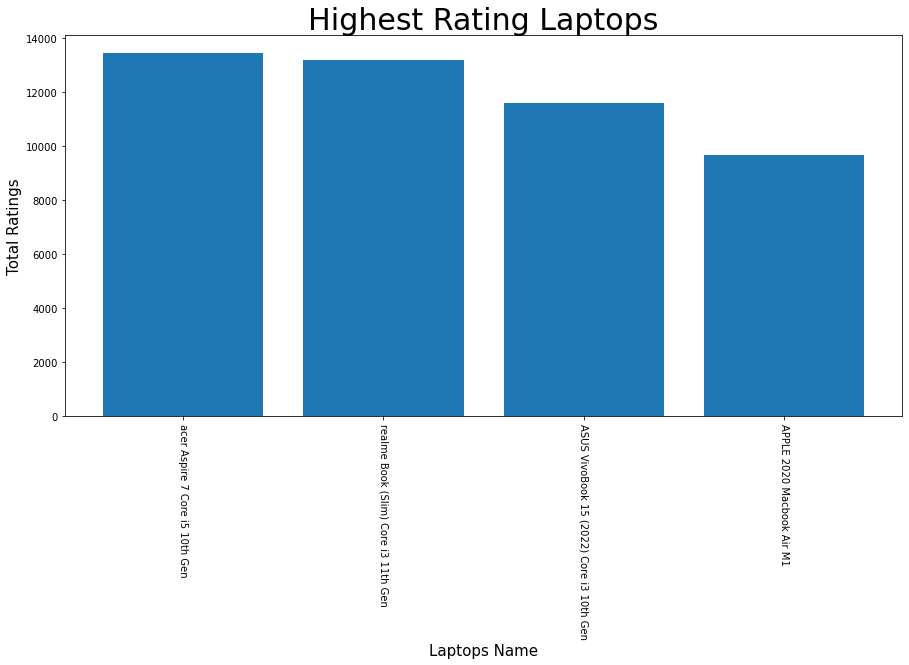

In [45]:
plt.figure(figsize=(15,7))
plt.bar(x=top['ProductName'],height=top['Ratings'])
plt.title("Highest Rating Laptops", fontsize=30)
plt.xlabel('Laptops Name',fontsize=15)
plt.ylabel('Total Ratings',fontsize=15)
plt.xticks(rotation=270)
plt.savefig('myfirstchart.jpg')
plt.show()

 ### Most Affordable laptops

In [53]:
top10=df.sort_values(by = "CurrentPrice",ascending = True).head(10)
top10

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,Ram,Storage,ImageURL
778,ASUS Chromebook Flip Touch Celeron Dual Core,4.0,2541,355,16990,31990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,29.46 cm (11.6 inch) Touchscreen Display,https://rukminim1.flixcart.com/image/312/312/x...
734,ASUS Chromebook Flip Touch Celeron Dual Core,4.0,2541,355,16990,31990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,29.46 cm (11.6 inch) Touchscreen Display,https://rukminim1.flixcart.com/image/312/312/x...
369,ASUS Chromebook Flip Touch Celeron Dual Core,4.0,2541,355,16990,31990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,29.46 cm (11.6 inch) Touchscreen Display,https://rukminim1.flixcart.com/image/312/312/x...
353,ASUS Chromebook Flip Touch Celeron Dual Core,4.0,2541,355,16990,31990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,29.46 cm (11.6 inch) Touchscreen Display,https://rukminim1.flixcart.com/image/312/312/x...
303,ASUS Chromebook Flip Touch Celeron Dual Core,4.0,2541,355,16990,31990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,29.46 cm (11.6 inch) Touchscreen Display,https://rukminim1.flixcart.com/image/312/312/x...
155,ASUS Chromebook Flip Touch Celeron Dual Core,4.0,2541,355,16990,31990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,29.46 cm (11.6 inch) Touchscreen Display,https://rukminim1.flixcart.com/image/312/312/x...
496,ASUS Chromebook Flip Touch Celeron Dual Core,4.0,2541,355,16990,31990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,29.46 cm (11.6 inch) Touchscreen Display,https://rukminim1.flixcart.com/image/312/312/x...
679,ASUS Chromebook Flip Touch Celeron Dual Core,4.0,2541,355,16990,31990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,29.46 cm (11.6 inch) Touchscreen Display,https://rukminim1.flixcart.com/image/312/312/x...
283,ASUS Chromebook Flip Touch Celeron Dual Core,4.0,2541,355,16990,31990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,29.46 cm (11.6 inch) Touchscreen Display,https://rukminim1.flixcart.com/image/312/312/x...
520,ASUS Chromebook Flip Touch Celeron Dual Core,4.0,2541,355,16990,31990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,29.46 cm (11.6 inch) Touchscreen Display,https://rukminim1.flixcart.com/image/312/312/x...


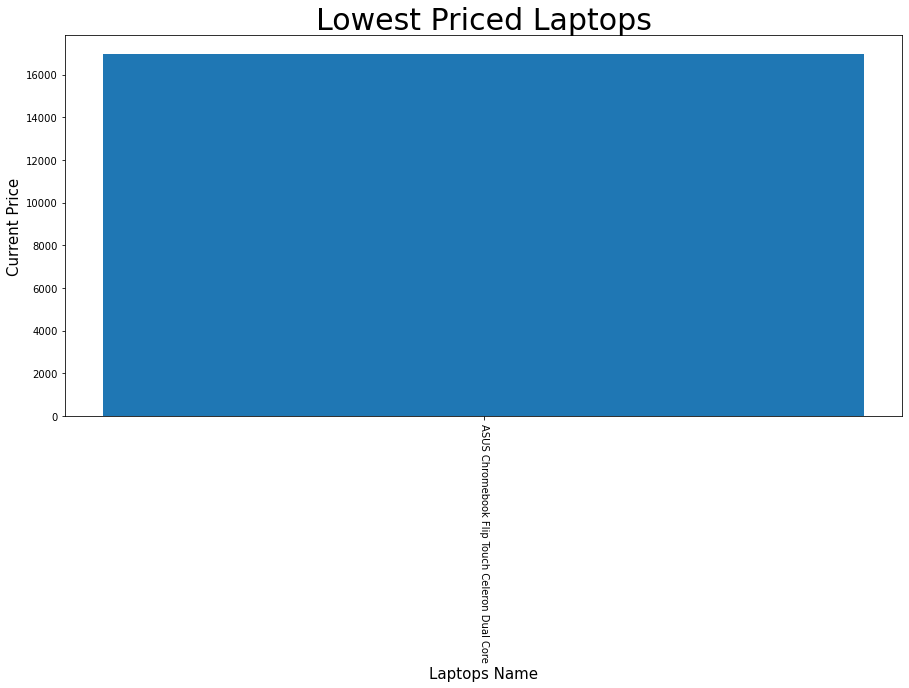

In [54]:
plt.figure(figsize=(15,7))
plt.bar(x=top10['ProductName'],height=top10['CurrentPrice'])
plt.title("Lowest Priced Laptops", fontsize=30)
plt.xlabel('Laptops Name',fontsize=15)
plt.ylabel('Current Price',fontsize=15)
plt.xticks(rotation=270)
plt.savefig('myfirstchart.jpg')
plt.show()

In [56]:
smalldf= df[['ProductName','CurrentPrice','MRP']]
smalldf.head()

,ProductName,CurrentPrice,MRP
0,HP 14s Intel Core i3 11th Gen,40490,49509
1,HP 15s Intel Core i3 12th Gen,43990,56261
2,MSI Bravo 15 Ryzen 5 Hexa Core AMD R5,52990,72990
3,acer Extensa Core i5 11th Gen,42999,57999
4,HP Ryzen 5 Hexa Core 5500U,44580,54552


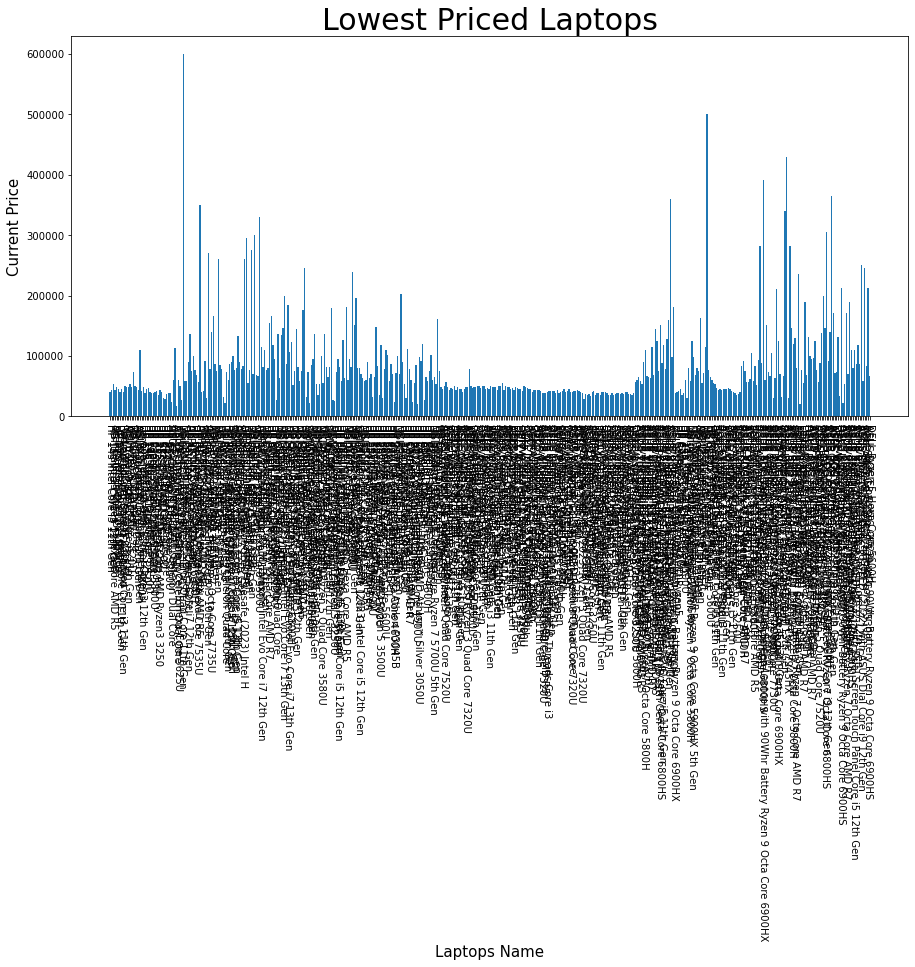

In [57]:
plt.figure(figsize=(15,7))
plt.bar(x=smalldf['ProductName'],height=smalldf['CurrentPrice'])
plt.title("Lowest Priced Laptops", fontsize=30)
plt.xlabel('Laptops Name',fontsize=15)
plt.ylabel('Current Price',fontsize=15)
plt.xticks(rotation=270)
plt.savefig('myfirstchart.jpg')
plt.show()

In [59]:
midrange_laptops = df[(df['CurrentPrice']<45000) & (df['CurrentPrice']>30000)]
midrange_laptops

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,Ram,Storage,ImageURL
0,HP 14s Intel Core i3 11th Gen,4.3,4207,367,40490,49509,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
1,HP 15s Intel Core i3 12th Gen,4.2,415,50,43990,56261,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
3,acer Extensa Core i5 11th Gen,4.0,276,24,42999,57999,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
4,HP Ryzen 5 Hexa Core 5500U,4.3,1569,117,44580,54552,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
5,HP 15s Intel Core i3 11th Gen,4.3,588,53,40990,50585,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
...,...,...,...,...,...,...,...,...,...,...
1796,Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen,0.0,0,0,33990,59390,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
1804,Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen,4.3,693,65,39990,68790,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
1812,Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen,4.2,391,26,33990,59390,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
1823,Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen,4.3,693,65,39990,68790,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...


In [67]:
ram = input("Ram? :")
storage = input("Storange? :")
processor =input("Processor? :")
# df.Ram == ram
# df.Storage == storage
# df.processor= Processor
df[(df.Ram==ram)&(df.Storage == storage)&(df.processor== Processor)]


Ram? :8 GB DDR4 RAM
Storange? :512 GB SSD
Processor? :Intel Core i3 Processor (12th Gen)


,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,Ram,Storage,ImageURL
0,HP 14s Intel Core i3 11th Gen,4.3,4207,367,40490,49509,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
1,HP 15s Intel Core i3 12th Gen,4.2,415,50,43990,56261,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
2,MSI Bravo 15 Ryzen 5 Hexa Core AMD R5,4.4,2743,365,52990,72990,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
3,acer Extensa Core i5 11th Gen,4.0,276,24,42999,57999,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
4,HP Ryzen 5 Hexa Core 5500U,4.3,1569,117,44580,54552,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
...,...,...,...,...,...,...,...,...,...,...
1804,Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen,4.3,693,65,39990,68790,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
1817,acer Aspire 5 Core i5 12th Gen,3.8,4,1,57990,74999,Intel Core i5 Processor (12th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
1823,Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen,4.3,693,65,39990,68790,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
1826,DELL Ryzen 5 Hexa Core 5600H,4.7,3,0,66990,101681,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
